# 研究

## セットアップ

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
%cd '/content/drive/MyDrive/研究'

/content/drive/MyDrive/研究


In [4]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install japanize_matplotlib
import japanize_matplotlib

from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
import lightgbm as lgb

import torch
from torch import nn,optim
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torchvision import transforms
!pip install torchinfo
from torchinfo import summary
from torch.autograd import Variable

!pip install optuna
import optuna
# ログを抑制
#optuna.logging.set_verbosity(optuna.logging.WARNING)

from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 46.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e8664d747017724af9c00af28ee5fc5c2ca8741d545567fc0868676ea617f340
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 15.6 MB/s eta 0:00:00


## データ

In [5]:
RV = pd.read_csv('NK225_RV.csv')
RV

,date,1min,2min,3min,4min,5min,6min,7min,8min,9min,...,21min,22min,23min,24min,25min,26min,27min,28min,29min,30min
0,1996/3/11,0.000071,0.000102,0.000130,0.000146,0.000151,0.000160,0.000152,0.000161,0.000168,...,0.000125,0.000110,0.000128,0.000167,0.000175,0.000155,0.000137,0.000168,0.000151,0.000176
1,1996/3/12,0.000025,0.000038,0.000044,0.000049,0.000048,0.000053,0.000047,0.000058,0.000055,...,0.000043,0.000046,0.000049,0.000057,0.000047,0.000039,0.000038,0.000036,0.000044,0.000043
2,1996/3/13,0.000063,0.000089,0.000092,0.000073,0.000072,0.000077,0.000077,0.000086,0.000079,...,0.000086,0.000098,0.000094,0.000072,0.000079,0.000092,0.000108,0.000101,0.000087,0.000092
3,1996/3/14,0.000042,0.000049,0.000053,0.000062,0.000049,0.000053,0.000057,0.000068,0.000055,...,0.000054,0.000059,0.000069,0.000077,0.000069,0.000074,0.000073,0.000066,0.000063,0.000052
4,1996/3/15,0.000084,0.000100,0.000094,0.000099,0.000110,0.000116,0.000137,0.000123,0.000130,...,0.000122,0.000098,0.000120,0.000125,0.000086,0.000100,0.000088,0.000121,0.000117,0.000071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,2023/9/25,0.000026,0.000027,0.000029,0.000030,0.000022,0.000032,0.000016,0.000025,0.000032,...,0.000024,0.000024,0.000028,0.000039,0.000035,0.000034,0.000034,0.000023,0.000028,0.000021
6756,2023/9/26,0.000029,0.000027,0.000027,0.000031,0.000036,0.000031,0.000027,0.000031,0.000032,...,0.000038,0.000045,0.000039,0.000042,0.000052,0.000047,0.000049,0.000046,0.000046,0.000055
6757,2023/9/27,0.000036,0.000030,0.000035,0.000026,0.000035,0.000032,0.000033,0.000027,0.000029,...,0.000035,0.000040,0.000031,0.000021,0.000029,0.000033,0.000038,0.000027,0.000021,0.000029
6758,2023/9/28,0.000057,0.000061,0.000080,0.000073,0.000088,0.000093,0.000080,0.000107,0.000101,...,0.000082,0.000120,0.000100,0.000088,0.000135,0.000126,0.000113,0.000094,0.000082,0.000123


In [6]:
# date列をdatetime型に変換
RV['date'] = pd.to_datetime(RV['date'])

# date列をインデックスに設定
RV.set_index('date', inplace=True)

In [7]:
RV = 10000*RV

In [8]:
data = RV[['5min', '30min']]

In [9]:
Return = pd.read_csv('NK225_Return.csv')
Return

,date,return
0,1996/4/10,0.218349
1,1996/4/11,-0.447362
2,1996/4/12,-0.156661
3,1996/4/15,1.022297
4,1996/4/16,-0.067975
...,...,...
6734,2023/9/25,0.848824
6735,2023/9/26,-1.118798
6736,2023/9/27,0.175770
6737,2023/9/28,-1.554657


In [10]:
data['log_5min'] = np.log(data['5min'])
data

<ipython-input-10-55152b47e24d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_5min'] = np.log(data['5min'])


,5min,30min,log_5min
date,,,
1996-03-11,1.50927,1.76196,0.411626
1996-03-12,0.48000,0.43200,-0.733969
1996-03-13,0.72100,0.91600,-0.327116
1996-03-14,0.48700,0.52000,-0.719491
1996-03-15,1.09568,0.71100,0.091375
...,...,...,...
2023-09-25,0.21900,0.21100,-1.518684
2023-09-26,0.36400,0.54600,-1.010601
2023-09-27,0.35200,0.28700,-1.044124


In [11]:
# date列をdatetime型に変換
Return['date'] = pd.to_datetime(Return['date'])

# date列をインデックスに設定
Return.set_index('date', inplace=True)

In [12]:
Return['return_abs'] = Return['return'].abs()

Return['return_dummy'] = (Return['return'] < 0).astype(int)

Return['return_abs_times_dummy'] = Return['return_abs'] * Return['return_dummy']

In [13]:
data = pd.merge(data, Return, left_index=True, right_index=True, how='left')
data

,5min,30min,log_5min,return,return_abs,return_dummy,return_abs_times_dummy
date,,,,,,,
1996-03-11,1.50927,1.76196,0.411626,NaN,NaN,NaN,NaN
1996-03-12,0.48000,0.43200,-0.733969,NaN,NaN,NaN,NaN
1996-03-13,0.72100,0.91600,-0.327116,NaN,NaN,NaN,NaN
1996-03-14,0.48700,0.52000,-0.719491,NaN,NaN,NaN,NaN
1996-03-15,1.09568,0.71100,0.091375,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-09-25,0.21900,0.21100,-1.518684,0.848824,0.848824,0.0,0.000000
2023-09-26,0.36400,0.54600,-1.010601,-1.118798,1.118798,1.0,1.118798
2023-09-27,0.35200,0.28700,-1.044124,0.175770,0.175770,0.0,0.000000


## モデル

### パイプライン

In [14]:
def run_model_pipeline(
    data,
    embedding_flag,
    prepare_features_func,
    n_splits,
    window_size,
    scaler_func=None,
    tune_model_func=None,
    train_model_func=None,
    predict_func=None,
    model_name="model"
):
    # 特徴量と目的変数のセットを作成（X_dict, y）
    X_full, y_full = prepare_features_func(data, embedding_flag)
    total_length = len(y_full)

    # 時系列分割インデックス
    split_indices = np.linspace(0, total_length -1 , n_splits + 1, dtype=int)

    val_ratio = 1/window_size
    test_ratio = 1/window_size

    preds_all = []

    for start_idx in range(n_splits - window_size + 1):
        start = split_indices[start_idx]
        end = split_indices[start_idx + window_size]

        # 期間内の特徴量と目的変数の抽出
        X_period = X_full[start:end]
        y_period = y_full[start:end]

        # train/test のホールドアウト分割
        X_temp, X_test, y_temp, y_test = train_test_split(
            X_period, y_period, test_size=test_ratio, shuffle=False
        )

        # train/val のホールドアウト分割
        relative_val_size = val_ratio / (1 - test_ratio)
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=relative_val_size, shuffle=False
        )

        # スケーリング（あれば）
        if scaler_func is not None:
            X_train_scaled, X_val_scaled, X_test_scaled, y_train_scaled, y_val_scaled, y_test_scaled, inverse_y = scaler_func(
                X_train, X_val, X_test, y_train, y_val, y_test
            )
        else:
            X_train_scaled, X_val_scaled, X_test_scaled = X_train, X_val, X_test
            y_train_scaled, y_val_scaled, y_test_scaled = y_train, y_val, y_test
            inverse_y = lambda x: x

        # チューニングがあるときだけハイパーパラメータを取得
        if tune_model_func:
            best_params = tune_model_func(X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled)
        else:
            best_params = {}

        # モデル学習
        model = train_model_func(X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, best_params)

        # 予測
        if start_idx == 0:
            y_train_pred = inverse_y(predict_func(model, X_train_scaled))
            y_val_pred = inverse_y(predict_func(model, X_val_scaled))
            y_test_pred = inverse_y(predict_func(model, X_test_scaled))

            # 単純に y_train と比較できます。
            error_variance = np.var(y_train_pred - y_train, ddof=1)

            # 予測値をまとめ、元スケールに戻す
            preds = np.concatenate([y_train_pred, y_val_pred, y_test_pred])
            preds = np.exp(preds + 0.5 * error_variance)
            preds_all.extend(preds)
        else:
            y_train_pred = inverse_y(predict_func(model, X_train_scaled))
            y_test_pred = inverse_y(predict_func(model, X_test_scaled))

            # 単純に y_train と比較できます。
            error_variance = np.var(y_train_pred - y_train, ddof=1)

            preds_all.extend(np.exp(y_test_pred + 0.5 * error_variance))

    final_index = data.index[-len(preds_all):]

    pred_series = pd.Series(preds_all, index=final_index)

    data[model_name] = np.nan
    data.loc[final_index, model_name] = pred_series

    return data

In [15]:
n_splits=9
window_size=7

### HARモデル

In [16]:
def prepare_features_HAR(data: pd.DataFrame, embedding_flag: bool = False):
    """
    HARモデル用の特徴量と目的変数を作成する関数。

    Parameters:
    - data: pandas DataFrame, 必須カラム ['5min', '30min', 'log_5min', 'return',
      'return_abs', 'return_dummy', 'return_abs_times_dummy'] を含む
    - embedding_flag: bool,
        False: 説明変数はHAR基本特徴量 + return_abs, return_abs_times_dummy
        True: 上記に加え、embedding 次元の列を全て含める

    Returns:
    - X: numpy.ndarray, 特徴量行列
      列順:
        1. log_5min_daily
        2. log_5min_weekly
        3. log_5min_monthly
        4. return_abs_lag
        5. return_abs_times_dummy_lag
        6. (embedding_flag=True の場合) embedding 列群の i-1 ラグ
    - y: numpy.ndarray, 目的変数（当日 log_5min）

    Notes:
    - 先頭22行は過去22時点分のデータが取れないためサンプルに含めません。
    - embedding_flag=True の場合、data.columns から生の説明変数カラム群
      ['5min','30min','log_5min','return','return_abs','return_dummy','return_abs_times_dummy']
      を除いた全列を embedding 次元列とみなし、i-1 時点の値を追加します。
    """
    # 必須カラム欠損行排除
    base_cols = ['log_5min', 'return_abs', 'return_abs_times_dummy']
    # “dim_” で始まるカラムだけを抽出する
    embed_cols = [col for col in data.columns if col.startswith('dim_')]
    df = data.reset_index(drop=True).dropna(subset=base_cols+embed_cols)
    n = len(df)

    X_list = []
    y_list = []
    for i in range(22, n):
        # HAR 基本特徴量
        log_5min_daily = df['log_5min'].iloc[i-1]
        log_5min_weekly = np.log(df['5min'].iloc[i-5:i].mean())
        log_5min_monthly = np.log(df['5min'].iloc[i-22:i].mean())

        # 外生変数：return_abs, return_abs_times_dummy
        return_abs_lag = df['return_abs'].iloc[i-1]
        return_abs_times_dummy_lag = df['return_abs_times_dummy'].iloc[i-1]

        features = [
            log_5min_daily,
            log_5min_weekly,
            log_5min_monthly,
            return_abs_lag,
            return_abs_times_dummy_lag
        ]

        if embedding_flag:
            # embedding 列群の i-1 ラグを追加
            for col in embed_cols:
                features.append(df[col].iloc[i-1])

        X_list.append(np.array(features, dtype=float))
        y_list.append(df['log_5min'].iloc[i])

    X = np.vstack(X_list)
    y = np.array(y_list, dtype=float)

    return X, y

In [17]:
def train_model_HAR(
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_val: np.ndarray,
    y_val: np.ndarray,
    best_params: dict = None
):
    """
    線形回帰モデルを訓練用データと検証用データを結合して学習させる関数。

    Args:
        X_train (np.ndarray): 訓練用特徴量
        y_train (np.ndarray): 訓練用目的変数
        X_val (np.ndarray): 検証用特徴量
        y_val (np.ndarray): 検証用目的変数
        best_params (dict): モデルのハイパーパラメータ（線形回帰では未使用）

    Returns:
        model: 学習済みのLinearRegressionモデル
    """
    # 訓練データと検証データを結合
    X_combined = np.vstack([X_train, X_val])
    y_combined = np.concatenate([y_train, y_val])

    # モデルの初期化
    model = LinearRegression(**best_params) if best_params else LinearRegression()

    # 結合データで学習
    model.fit(X_combined, y_combined)
    return model

In [18]:
def predict_HAR(model, X: np.ndarray) -> np.ndarray:
    """
    学習済みの線形回帰モデルで予測を行う関数。

    Args:
        model: 学習済みのLinearRegressionモデル
        X (np.ndarray): 予測を行いたい特徴量

    Returns:
        predictions (np.ndarray): モデルによる予測値
    """
    return model.predict(X)

In [19]:
run_model_pipeline(data=data, embedding_flag=False,prepare_features_func=prepare_features_HAR, n_splits=n_splits, window_size=window_size, scaler_func=None, tune_model_func=None, train_model_func=train_model_HAR, predict_func=predict_HAR, model_name='HAR')

,5min,30min,log_5min,return,return_abs,return_dummy,return_abs_times_dummy,HAR
date,,,,,,,,
1996-03-11,1.50927,1.76196,0.411626,NaN,NaN,NaN,NaN,NaN
1996-03-12,0.48000,0.43200,-0.733969,NaN,NaN,NaN,NaN,NaN
1996-03-13,0.72100,0.91600,-0.327116,NaN,NaN,NaN,NaN,NaN
1996-03-14,0.48700,0.52000,-0.719491,NaN,NaN,NaN,NaN,NaN
1996-03-15,1.09568,0.71100,0.091375,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-09-25,0.21900,0.21100,-1.518684,0.848824,0.848824,0.0,0.000000,0.290741
2023-09-26,0.36400,0.54600,-1.010601,-1.118798,1.118798,1.0,1.118798,0.351369
2023-09-27,0.35200,0.28700,-1.044124,0.175770,0.175770,0.0,0.000000,0.272862


In [20]:
data.head(50)

,5min,30min,log_5min,return,return_abs,return_dummy,return_abs_times_dummy,HAR
date,,,,,,,,
1996-03-11,1.50927,1.76196,0.411626,NaN,NaN,NaN,NaN,NaN
1996-03-12,0.48000,0.43200,-0.733969,NaN,NaN,NaN,NaN,NaN
1996-03-13,0.72100,0.91600,-0.327116,NaN,NaN,NaN,NaN,NaN
1996-03-14,0.48700,0.52000,-0.719491,NaN,NaN,NaN,NaN,NaN
1996-03-15,1.09568,0.71100,0.091375,NaN,NaN,NaN,NaN,NaN
1996-03-18,0.66600,0.24400,-0.406466,NaN,NaN,NaN,NaN,NaN
1996-03-19,1.61955,0.92200,0.482148,NaN,NaN,NaN,NaN,NaN
1996-03-21,0.67600,0.93000,-0.391562,NaN,NaN,NaN,NaN,NaN
1996-03-22,0.78300,0.53600,-0.244623,NaN,NaN,NaN,NaN,NaN


In [21]:
# Q-LIKEを計算する関数の定義
def q_like(actual, predicted):
    """
    Q-LIKE指標を計算する関数
    :param actual: 実測値 (numpy array or pandas Series)
    :param predicted: 予測値 (numpy array or pandas Series)
    :return: Q-LIKE
    """
    return np.mean(np.log(predicted) + (actual / predicted))

In [22]:
model_scores = {}

def evaluate_model(
    data,
    actual_col,
    pred_col,
    n_splits,
    window_size,
    loss_name,
    loss_func,
  ):
      # NaN除去後の予測対象範囲のインデックス抽出
      data_nonan = data[[actual_col, pred_col]].dropna()
      pred_index = data_nonan.index

      total_len = len(pred_index)
      split_indices = np.linspace(0, total_len, n_splits + 1, dtype=int)

      test_ratio = 1/window_size

      # 最初の期間の範囲（インデックスでなく、行番号ベース）
      start = split_indices[0]
      end = split_indices[window_size]
      test_start = int(start + (end - start) * (1 - test_ratio))  # テスト開始点（行番号）

      # インデックスに変換
      test_index = pred_index[test_start:]

      loss = loss_func(data_nonan.loc[test_index, actual_col], data_nonan.loc[test_index, pred_col])

      # pred_colがまだ存在しない場合は空の辞書として追加
      if pred_col not in model_scores:
          model_scores[pred_col] = {}

      # loss_nameがまだ存在しない場合は追加
      if loss_name not in model_scores[pred_col]:
          model_scores[pred_col][loss_name] = loss

      return loss

In [23]:
evaluate_model(data=data, actual_col='30min', pred_col='HAR', n_splits=n_splits, window_size=window_size, loss_name='MSE', loss_func=mean_squared_error)

1.9541895788854966

In [24]:
evaluate_model(data=data, actual_col='30min', pred_col='HAR', n_splits=n_splits, window_size=window_size, loss_name='Q-LIKE', loss_func=q_like)

np.float64(0.26120666701300316)

In [25]:
model_scores

{'HAR': {'MSE': 1.9541895788854966, 'Q-LIKE': np.float64(0.26120666701300316)}}

In [26]:
def plot_prediction_split(
    data,
    actual_col,         # 実測値の列名（例：'5min'）
    pred_col,          # 予測値の列名（例：'HAR'）
    n_splits,          # 分割数（例：7）
    window_size,       # 1つの期間の分割数（例：5）
):
    # NaN除去後の予測対象範囲のインデックス抽出
    data_nonan = data[[actual_col, pred_col]].dropna()
    pred_index = data_nonan.index

    total_len = len(pred_index)
    split_indices = np.linspace(0, total_len, n_splits + 1, dtype=int)

    test_ratio = 1/window_size

    # 最初の期間の範囲（インデックスでなく、行番号ベース）
    start = split_indices[0]
    end = split_indices[window_size]
    test_start = int(start + (end - start) * (1 - test_ratio))  # テスト開始点（行番号）

    # インデックスに変換
    train_index = pred_index[start:test_start]
    test_index = pred_index[test_start:]

    # プロット
    plt.figure(figsize=(12, 6))
    plt.plot(pred_index, data_nonan[actual_col], label='実測値')

    # 訓練予測部分
    plt.plot(train_index, data_nonan.loc[train_index, pred_col], label=f'{pred_col}（train）')
    plt.plot(test_index, data_nonan.loc[test_index, pred_col], label=f'{pred_col}（test）')

    plt.xlabel('time')
    plt.ylabel('RV')
    plt.title(f'{pred_col}')
    plt.legend()
    plt.tight_layout()
    plt.show()


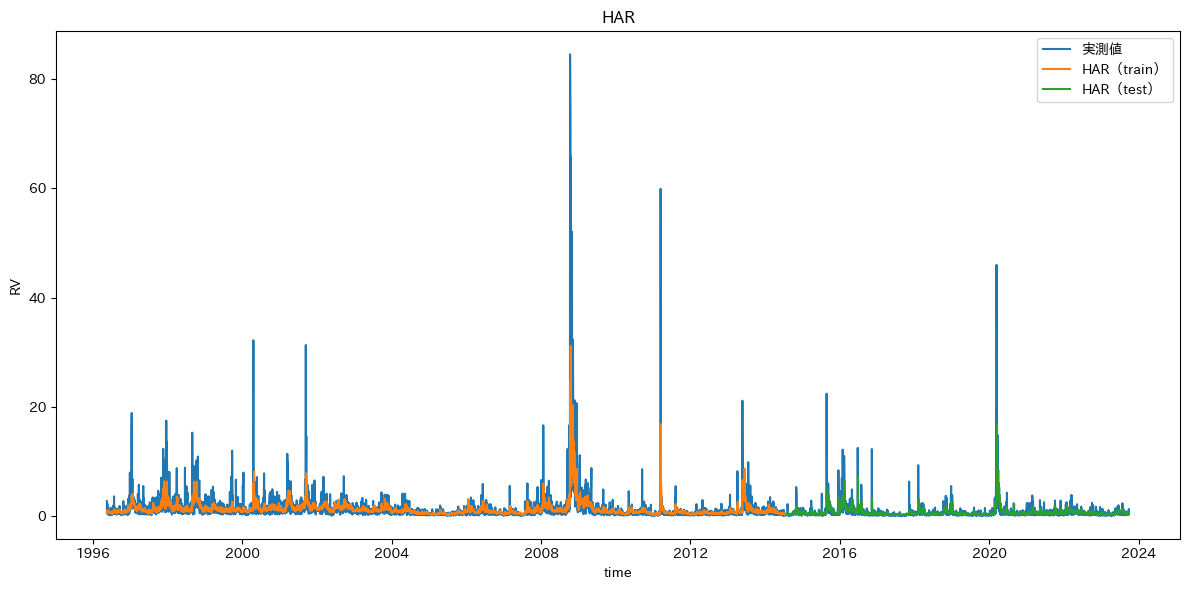

In [27]:
plot_prediction_split(data=data, actual_col='30min', pred_col='HAR', n_splits=n_splits, window_size=window_size)

### LSTM

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
class LSTM(nn.Module):
    """
    LSTM でシーケンスを符号化し、最終時点の hidden state を
    全結合層でスカラーに変換して回帰予測を行うモデル。

    - seq_input: Tensor of shape (batch_size, seq_len, input_dim_seq)
    - returns: Tensor of shape (batch_size,)  (スカラー予測)
    """
    def __init__(
        self,
        input_dim_seq: int,
        hidden_dim: int = 64,
        num_layers: int = 1,
        dropout: float = 0.0
    ):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim_seq,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0
        )
        # hidden_dim → 1（スカラー）
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, seq_input: torch.Tensor) -> torch.Tensor:
        # seq_input: (batch, seq_len, input_dim_seq)
        # h_n: (num_layers, batch, hidden_dim)
        _, (h_n, _) = self.lstm(seq_input)
        # 最終レイヤーの hidden state を取り出す
        last_hidden = h_n[-1]                 # shape: (batch, hidden_dim)
        out = self.fc(last_hidden).squeeze(1) # shape: (batch,)
        return out

In [30]:
def prepare_features_LSTM(data: pd.DataFrame, embedding_flag: bool = False):
    """
    LSTMモデル用の系列特徴量と目的変数を作成する関数。

    Parameters:
    - data: pandas DataFrame,
        必須カラム ['log_5min', 'return_abs', 'return_abs_times_dummy'] を含む。
        その他に埋め込み列がある場合も可。
    - embedding_flag: bool,
        False: dynamic columns = ['log_5min', 'return_abs', 'return_abs_times_dummy']
        True : dynamic columns に加え、DataFrame中の埋め込み列（上記以外のすべて）も含める

    Returns:
    - X: numpy.ndarray, shape (n_samples, seq_len, n_features)
        seq_len=22, n_features = 3 or 3 + n_embed
    - y: numpy.ndarray, shape (n_samples,)
        目的変数は時点iの 'log_5min'

    Notes:
    - 先頭22行はサンプルに含めず、i=22から開始
    """
    # 必須カラムの欠損を排除
    base_cols = ['log_5min', 'return_abs', 'return_abs_times_dummy']
    # “dim_” で始まるカラムだけを抽出する
    embed_cols = [col for col in data.columns if col.startswith('dim_')]
    df = data.reset_index(drop=True).dropna(subset=base_cols+embed_cols)
    n = len(df)

    # 動的に利用する列リスト
    if embedding_flag:
        dynamic_cols = base_cols + embed_cols
    else:
        dynamic_cols = base_cols

    seq_len = 22
    X_list = []
    y_list = []
    for i in range(seq_len, n):
        seq_window = df[dynamic_cols].iloc[i-seq_len:i].values  # shape (seq_len, n_features)
        X_list.append(seq_window)
        y_list.append(df['log_5min'].iloc[i])

    X = np.stack(X_list)  # (n_samples, seq_len, n_features)
    y = np.array(y_list)

    return X, y


In [31]:
def scaler_LSTM(
    X_train: np.ndarray,
    X_val: np.ndarray,
    X_test: np.ndarray,
    y_train: np.ndarray,
    y_val: np.ndarray,
    y_test: np.ndarray
):
    """
    LSTMモデル用の系列特徴量と目的変数を MinMaxScaler でスケーリングする関数。

    Args:
        X_train, X_val, X_test: numpy.ndarray, shape (N, seq_len, n_features)
        y_train, y_val, y_test: numpy.ndarray, shape (N,)

    Returns:
        X_train_s, X_val_s, X_test_s: numpy.ndarray, スケーリング後の系列特徴量
        y_train_s, y_val_s, y_test_s: numpy.ndarray, スケーリング後の目的変数
        inverse_y: callable, スケーリングされた y を元のスケールに戻す関数
    """
    # シーケンス特徴量のスケーリング
    _, seq_len, n_features = X_train.shape
    scaler_X = MinMaxScaler()
    # reshape to (N_train*seq_len, n_features)
    X_train_flat = X_train.reshape(-1, n_features)
    X_train_flat_s = scaler_X.fit_transform(X_train_flat)
    X_val_flat = X_val.reshape(-1, n_features)
    X_val_flat_s = scaler_X.transform(X_val_flat)
    X_test_flat = X_test.reshape(-1, n_features)
    X_test_flat_s = scaler_X.transform(X_test_flat)
    # reshape back
    X_train_s = X_train_flat_s.reshape(X_train.shape[0], seq_len, n_features)
    X_val_s   = X_val_flat_s.reshape(X_val.shape[0], seq_len, n_features)
    X_test_s  = X_test_flat_s.reshape(X_test.shape[0], seq_len, n_features)

    # 目的変数のスケーリング
    scaler_y = MinMaxScaler()
    y_train_s = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
    y_val_s   = scaler_y.transform(y_val.reshape(-1, 1)).flatten()
    y_test_s  = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

    # 逆変換関数
    def inverse_y(y_scaled: np.ndarray) -> np.ndarray:
        return scaler_y.inverse_transform(y_scaled.reshape(-1, 1)).flatten()

    return X_train_s, X_val_s, X_test_s, y_train_s, y_val_s, y_test_s, inverse_y

In [32]:
def tune_model_LSTM(
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_val: np.ndarray,
    y_val: np.ndarray
) -> dict:
    """
    Optuna を用いて LSTM のハイパーパラメータチューニングを行う関数。
    device に応じてモデル／データを移動させるように修正済み。
    """
    def objective(trial):
        # チューニングするパラメータ
        hidden_dim = trial.suggest_int('hidden_dim', 32, 128)
        num_layers = trial.suggest_int('num_layers', 1, 3)
        batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
        lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)

        # DataLoader の準備
        train_dataset = TensorDataset(
            torch.tensor(X_train, dtype=torch.float32),
            torch.tensor(y_train, dtype=torch.float32)
        )
        val_dataset = TensorDataset(
            torch.tensor(X_val, dtype=torch.float32),
            torch.tensor(y_val, dtype=torch.float32)
        )
        train_loader = DataLoader(
            train_dataset, batch_size=batch_size, shuffle=True,
            pin_memory=True  # CUDA 時の転送を高速化
        )
        val_loader = DataLoader(
            val_dataset, batch_size=batch_size, shuffle=False,
            pin_memory=True
        )

        # モデル初期化＆ device へ移動
        input_dim_seq = X_train.shape[2]
        model = LSTM(
            input_dim_seq=input_dim_seq,
            hidden_dim=hidden_dim,
            num_layers=num_layers
        ).to(device)

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        # 学習
        model.train()
        epochs = 50
        for _ in range(epochs):
            for X_batch, y_batch in train_loader:
                # デバイスへ転送
                X_batch = X_batch.to(device, non_blocking=True)
                y_batch = y_batch.to(device, non_blocking=True)
                optimizer.zero_grad()
                output = model(X_batch)
                loss = criterion(output, y_batch)
                loss.backward()
                optimizer.step()

        # 検証
        model.eval()
        total_val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch = X_batch.to(device, non_blocking=True)
                y_batch = y_batch.to(device, non_blocking=True)

                output = model(X_batch)
                total_val_loss += criterion(output, y_batch).item()

        return total_val_loss / len(val_loader)

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=20)
    return study.best_params

In [33]:
def train_model_LSTM(
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_val: np.ndarray,
    y_val: np.ndarray,
    best_params: dict,
    device: torch.device = torch.device('cpu')
) -> nn.Module:
    """
    LSTMモデルを結合データで学習し、early stoppingを適用する関数。

    Args:
        X_train: numpy.ndarray, shape (N_train, seq_len, n_features)
        y_train: numpy.ndarray, shape (N_train,)
        X_val:   numpy.ndarray, shape (N_val,   seq_len, n_features)
        y_val:   numpy.ndarray, shape (N_val,)
        best_params: dict, {
            'hidden_dim': int,
            'num_layers': int,
            'batch_size': int,
            'lr': float
        }
        device: torch.device, モデル・データを配置するデバイス

    Returns:
        model: 学習済みのLSTMモデル
    """
    # 訓練データと検証データを結合
    X = np.concatenate([X_train, X_val], axis=0)
    y = np.concatenate([y_train, y_val], axis=0)

    # DataLoader の準備
    dataset = TensorDataset(
        torch.tensor(X, dtype=torch.float32),
        torch.tensor(y, dtype=torch.float32)
    )
    loader = DataLoader(
        dataset,
        batch_size=best_params['batch_size'],
        shuffle=False
    )

    # モデル定義
    input_dim_seq = X.shape[2]
    model = LSTM(
        input_dim_seq=input_dim_seq,
        hidden_dim=best_params['hidden_dim'],
        num_layers=best_params['num_layers']
    ).to(device)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=best_params['lr'])

    # early stopping
    epochs = 100
    patience = 10
    best_loss = float('inf')
    counter = 0

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output.squeeze(), y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(loader)
        if avg_loss < best_loss:
            best_loss = avg_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                break

    return model

In [34]:
def predict_LSTM(model, X):
    """
    学習済みLSTMモデルで系列データから予測を行う関数。

    Args:
        model: torch.nn.Module, 学習済みLSTMモデル
        X: numpy.ndarray, shape (N, seq_len, n_features)

    Returns:
        numpy.ndarray: shape (N,), モデルの予測値
    """
    # モデルとデータを同じデバイス上に
    device = next(model.parameters()).device
    model.to(device)
    model.eval()

    # 入力データを TensorDataset & DataLoader に変換
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    dummy_y = torch.zeros(X_tensor.size(0), dtype=torch.float32).to(device)
    dataset = TensorDataset(X_tensor, dummy_y)
    loader = DataLoader(dataset, batch_size=128, shuffle=False)

    predictions = []
    with torch.no_grad():
        for X_batch, _ in loader:
            # X_batch だけをモデルに渡す
            output = model(X_batch)
            predictions.extend(output.cpu().numpy().reshape(-1))

    return np.array(predictions)

In [35]:
run_model_pipeline(data=data, embedding_flag=False, prepare_features_func=prepare_features_LSTM, n_splits=n_splits, window_size=window_size, scaler_func=scaler_LSTM, tune_model_func=tune_model_LSTM, train_model_func=train_model_LSTM, predict_func=predict_LSTM, model_name='LSTM')

[I 2025-05-18 01:15:00,937] A new study created in memory with name: no-name-324d8de5-53a8-4981-b5a2-a408d7681b63
[I 2025-05-18 01:16:12,677] Trial 0 finished with value: 0.006925085210241377 and parameters: {'hidden_dim': 94, 'num_layers': 1, 'batch_size': 64, 'lr': 0.00019243637457363829}. Best is trial 0 with value: 0.006925085210241377.
[I 2025-05-18 01:18:42,291] Trial 1 finished with value: 0.006955215086539586 and parameters: {'hidden_dim': 71, 'num_layers': 3, 'batch_size': 128, 'lr': 0.0006103310446885262}. Best is trial 0 with value: 0.006925085210241377.
[I 2025-05-18 01:19:49,935] Trial 2 finished with value: 0.006850313084820907 and parameters: {'hidden_dim': 115, 'num_layers': 1, 'batch_size': 128, 'lr': 0.00916058228957354}. Best is trial 2 with value: 0.006850313084820907.
[I 2025-05-18 01:20:45,457] Trial 3 finished with value: 0.006820690236054361 and parameters: {'hidden_dim': 71, 'num_layers': 1, 'batch_size': 32, 'lr': 0.007993688105831464}. Best is trial 3 with va

,5min,30min,log_5min,return,return_abs,return_dummy,return_abs_times_dummy,HAR,LSTM
date,,,,,,,,,
1996-03-11,1.50927,1.76196,0.411626,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-12,0.48000,0.43200,-0.733969,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-13,0.72100,0.91600,-0.327116,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-14,0.48700,0.52000,-0.719491,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-15,1.09568,0.71100,0.091375,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-09-25,0.21900,0.21100,-1.518684,0.848824,0.848824,0.0,0.000000,0.290741,0.339109
2023-09-26,0.36400,0.54600,-1.010601,-1.118798,1.118798,1.0,1.118798,0.351369,0.376603
2023-09-27,0.35200,0.28700,-1.044124,0.175770,0.175770,0.0,0.000000,0.272862,0.304926


In [36]:
data.head(50)

,5min,30min,log_5min,return,return_abs,return_dummy,return_abs_times_dummy,HAR,LSTM
date,,,,,,,,,
1996-03-11,1.50927,1.76196,0.411626,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-12,0.48000,0.43200,-0.733969,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-13,0.72100,0.91600,-0.327116,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-14,0.48700,0.52000,-0.719491,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-15,1.09568,0.71100,0.091375,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-18,0.66600,0.24400,-0.406466,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-19,1.61955,0.92200,0.482148,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-21,0.67600,0.93000,-0.391562,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-22,0.78300,0.53600,-0.244623,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
evaluate_model(data=data, actual_col='30min', pred_col='LSTM', n_splits=n_splits, window_size=window_size, loss_name='MSE', loss_func=mean_squared_error)

1.9910631980268403

In [38]:
evaluate_model(data=data, actual_col='30min', pred_col='LSTM', n_splits=n_splits, window_size=window_size, loss_name='Q-LIKE', loss_func=q_like)

np.float64(0.2534152874348953)

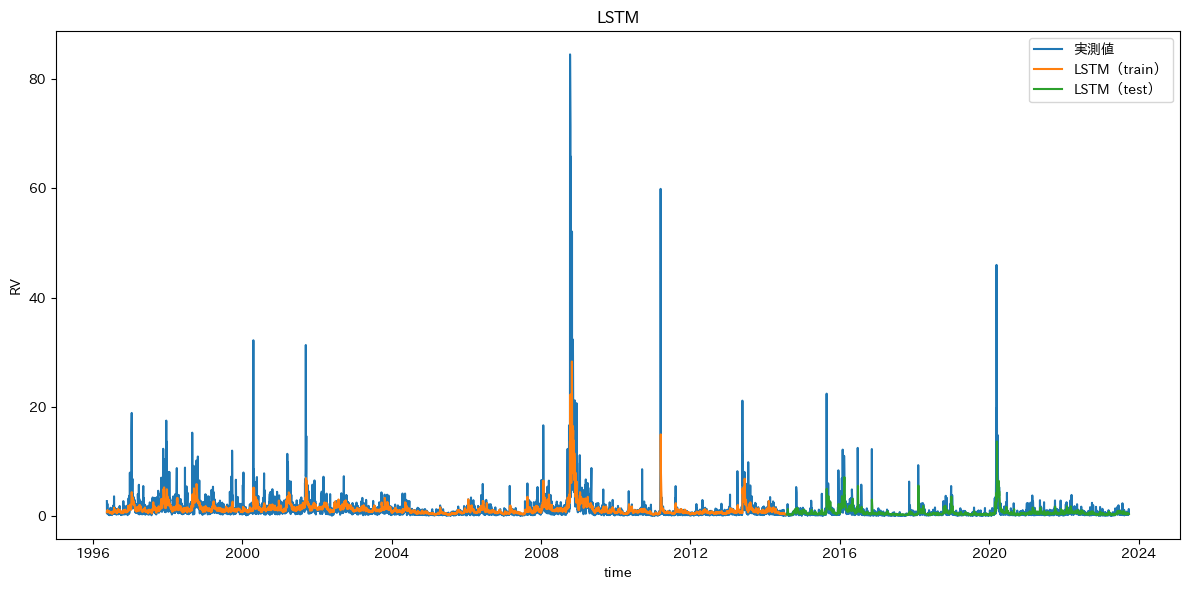

In [39]:
plot_prediction_split(data=data, actual_col='30min', pred_col='LSTM', n_splits=n_splits, window_size=window_size)

### ランダムフォレスト

In [40]:
def prepare_features_ML(data: pd.DataFrame, embedding_flag: bool = False):
    """
    機械学習モデル用の特徴量と目的変数を作成する関数。

    Parameters:
    - data: pandas DataFrame,
        必須カラム ['log_5min', 'return_abs', 'return_abs_times_dummy'] を含む。
        その他に埋め込み列がある場合も可。
    - embedding_flag: bool,
        False: 特徴量は過去22時点のlog_5min, return_abs, return_abs_times_dummyのラグ
        True : 上記に加え、DataFrame中の埋め込み列（除外リスト以外）の過去22時点の値も含める

    Returns:
    - X: numpy.ndarray, shape (n_samples, n_features)
        フラットな特徴量ベクトル
    - y: numpy.ndarray, shape (n_samples,)
        目的変数は時点iの 'log_5min'

    Notes:
    - 先頭22行はサンプルに含めず、i=22から開始
    - embedding_flag=True の場合、
      ['5min','30min','log_5min','return','return_abs','return_dummy','return_abs_times_dummy']
      を除く全ての列を埋め込み列とみなし、過去22時点分の値を追加します。
    """
    # 必須カラム欠損を排除
    base_cols = ['log_5min', 'return_abs', 'return_abs_times_dummy']
    # “dim_” で始まるカラムだけを抽出する
    embed_cols = [col for col in data.columns if col.startswith('dim_')]
    df = data.reset_index(drop=True).dropna(subset=base_cols+embed_cols)
    n = len(df)

    X_list = []
    y_list = []
    seq_len = 22
    for i in range(seq_len, n):
        # 過去22時点の log_5min
        past_vals = df['log_5min'].iloc[i-seq_len:i].values.tolist()
        # 過去22時点の return_abs ラグ
        return_abs_lags = df['return_abs'].iloc[i-seq_len:i].values.tolist()
        # 過去22時点の return_abs_times_dummy ラグ
        return_abs_times_dummy_lags = df['return_abs_times_dummy'].iloc[i-seq_len:i].values.tolist()

        # 基本特徴量ベクトルを結合
        features = past_vals + return_abs_lags + return_abs_times_dummy_lags

        if embedding_flag:
            # 埋め込み列群の過去22時点の値を追加
            for col in embed_cols:
                features.extend(df[col].iloc[i-seq_len:i].values.tolist())

        X_list.append(features)
        y_list.append(df['log_5min'].iloc[i])

    X = np.array(X_list, dtype=float)
    y = np.array(y_list, dtype=float)
    return X, y

In [41]:
def scaler_ML(X_train, X_val, X_test, y_train, y_val, y_test):
    """
    特徴量と目的変数を MinMaxScaler でスケーリングする関数。
    目的変数の逆変換関数も返す。

    Args:
        X_train, X_val, X_test: 特徴量データ（辞書）
        y_train, y_val, y_test: 目的変数（1次元）

    Returns:
        X_train_scaled, X_val_scaled, X_test_scaled: スケーリングされた特徴量
        y_train_scaled, y_val_scaled, y_test_scaled: スケーリングされた目的変数
        inverse_y: スケーリングされた y を元に戻す関数
    """
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_val_scaled = scaler_X.transform(X_val)
    X_test_scaled = scaler_X.transform(X_test)

    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
    y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

    def inverse_y(y_scaled):
        """スケーリングされた目的変数を元に戻す関数"""
        return scaler_y.inverse_transform(y_scaled.reshape(-1, 1)).flatten()

    return (
        X_train_scaled,
        X_val_scaled,
        X_test_scaled,
        y_train_scaled,
        y_val_scaled,
        y_test_scaled,
        inverse_y
    )


In [42]:
def tune_model_RF(X_train, y_train, X_val, y_val):
    """
    Optuna を用いてランダムフォレストのハイパーパラメータチューニングを行う関数。

    Args:
        X_train (ndarray): スケーリング済みの訓練特徴量
        y_train (ndarray): スケーリング済みの訓練目的変数
        X_val (ndarray): スケーリング済みの検証特徴量
        y_val (ndarray): スケーリング済みの検証目的変数

    Returns:
        best_params (dict): 最適なハイパーパラメータ
    """

    def objective(trial):
        # 探索するハイパーパラメータ
        n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
        max_depth = trial.suggest_categorical("max_depth", [10, 20, 30, 40, 50, None])
        min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

        # モデルの作成
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42,
            n_jobs=-1
        )

        # 学習と予測
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)

        # MSE を返す（最小化対象）
        return mean_squared_error(y_val, y_val_pred)

    # Optuna の study を作成して最適化を実行
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20)

    return study.best_params


In [43]:
def train_model_RF(X_train, y_train, X_val, y_val, best_params):
    """
    RandomForestRegressor を train + val データで学習する関数。

    Args:
        X_train (ndarray): 訓練データの特徴量
        y_train (ndarray): 訓練データの目的変数
        X_val (ndarray): 検証データの特徴量
        y_val (ndarray): 検証データの目的変数
        best_params (dict): Optuna などで得た最適なハイパーパラメータ

    Returns:
        model (RandomForestRegressor): 学習済みモデル
    """

    # 訓練データと検証データを結合して学習用データを作成
    X_trainval = np.concatenate([X_train, X_val], axis=0)
    y_trainval = np.concatenate([y_train, y_val], axis=0)

    # モデルの作成と学習
    model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
    model.fit(X_trainval, y_trainval)

    return model

In [44]:
def predict_ML(model, X):
    """
    学習済み RandomForest モデルで予測を行う関数。

    Args:
        model (RandomForestRegressor): 学習済みモデル
        X (ndarray): 予測に使う特徴量

    Returns:
        y_pred (ndarray): モデルによる予測結果（スケールされた状態）
    """
    return model.predict(X)

In [45]:
run_model_pipeline(data=data, embedding_flag=False, prepare_features_func=prepare_features_ML, n_splits=n_splits, window_size=window_size, scaler_func=scaler_ML, tune_model_func=tune_model_RF, train_model_func=train_model_RF, predict_func=predict_ML, model_name='RF')

[I 2025-05-18 03:14:38,669] A new study created in memory with name: no-name-5fc6a7f8-d88a-420e-b980-6fc2ebf0dd2f
[I 2025-05-18 03:15:30,685] Trial 0 finished with value: 0.007060913662910562 and parameters: {'n_estimators': 350, 'max_depth': 20, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.007060913662910562.
[I 2025-05-18 03:16:18,652] Trial 1 finished with value: 0.007050175989808137 and parameters: {'n_estimators': 350, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.007050175989808137.
[I 2025-05-18 03:16:36,789] Trial 2 finished with value: 0.007089241861503917 and parameters: {'n_estimators': 150, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.007050175989808137.
[I 2025-05-18 03:17:43,166] Trial 3 finished with value: 0.0070729915273248555 and parameters: {'n_estimators': 450, 'max_depth': None, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is 

,5min,30min,log_5min,return,return_abs,return_dummy,return_abs_times_dummy,HAR,LSTM,RF
date,,,,,,,,,,
1996-03-11,1.50927,1.76196,0.411626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-12,0.48000,0.43200,-0.733969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-13,0.72100,0.91600,-0.327116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-14,0.48700,0.52000,-0.719491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-15,1.09568,0.71100,0.091375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-09-25,0.21900,0.21100,-1.518684,0.848824,0.848824,0.0,0.000000,0.290741,0.339109,0.271273
2023-09-26,0.36400,0.54600,-1.010601,-1.118798,1.118798,1.0,1.118798,0.351369,0.376603,0.321808
2023-09-27,0.35200,0.28700,-1.044124,0.175770,0.175770,0.0,0.000000,0.272862,0.304926,0.257259


In [46]:
evaluate_model(data=data, actual_col='30min', pred_col='RF', n_splits=n_splits, window_size=window_size, loss_name='MSE', loss_func=mean_squared_error)

2.0942516777299645

In [47]:
evaluate_model(data=data, actual_col='30min', pred_col='RF', n_splits=n_splits, window_size=window_size, loss_name='Q-LIKE', loss_func=q_like)

np.float64(0.277323487712536)

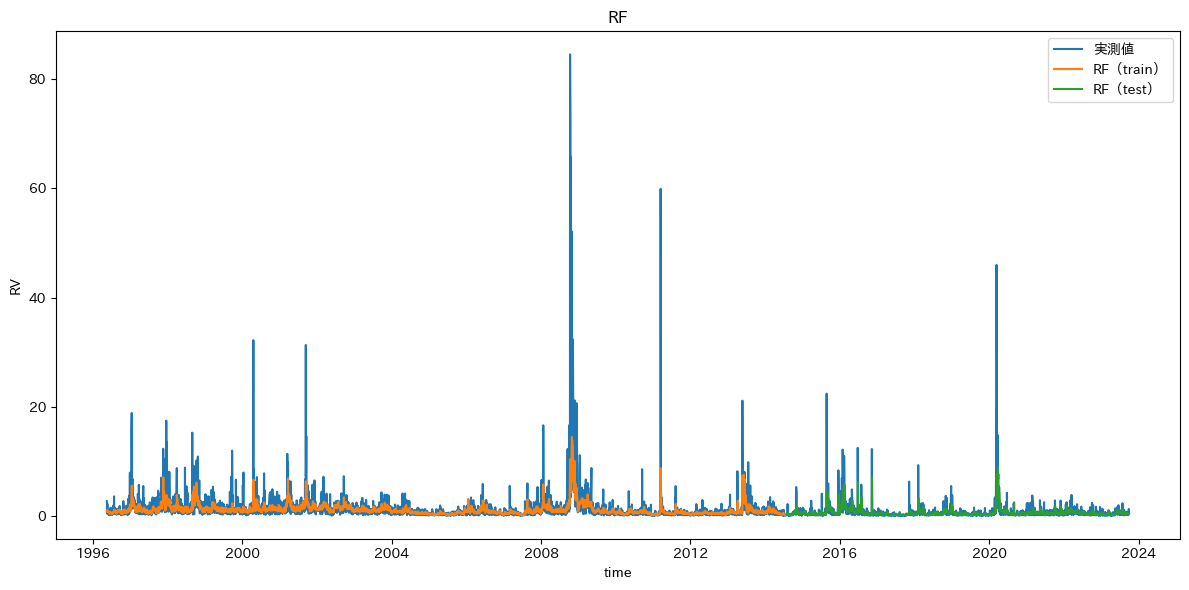

In [48]:
plot_prediction_split(data=data, actual_col='30min', pred_col='RF', n_splits=n_splits, window_size=window_size)

## XGBoost

In [49]:
def tune_model_XGB(X_train, y_train, X_val, y_val):
    """
    Optuna を用いて XGBoost のハイパーパラメータチューニングを行う関数。

    Args:
        X_train (ndarray): スケーリング済みの訓練特徴量
        y_train (ndarray): スケーリング済みの訓練目的変数
        X_val (ndarray): スケーリング済みの検証特徴量
        y_val (ndarray): スケーリング済みの検証目的変数

    Returns:
        best_params (dict): 最適なハイパーパラメータ
    """

    def objective(trial):
        # 探索するハイパーパラメータ
        n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True)
        gamma = trial.suggest_float("gamma", 0.0, 5.0)
        min_child_weight = trial.suggest_int("min_child_weight", 1, 50)
        colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
        subsample = trial.suggest_float("subsample", 0.5, 1.0)

        # モデルの作成
        model = xgb.XGBRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            gamma=gamma,
            min_child_weight=min_child_weight,
            colsample_bytree=colsample_bytree,
            subsample=subsample,
            random_state=42,
            n_jobs=-1,
            verbosity=0
        )

        # モデルの学習と評価
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        return mean_squared_error(y_val, y_val_pred)

    # チューニング実行
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20)

    return study.best_params

In [50]:
def train_model_XGB(X_train, y_train, X_val, y_val, best_params):
    """
    XGBoost を train + val データで学習する関数。

    Args:
        X_train (ndarray): 訓練データの特徴量
        y_train (ndarray): 訓練データの目的変数
        X_val (ndarray): 検証データの特徴量
        y_val (ndarray): 検証データの目的変数
        best_params (dict): Optuna などで得た最適なハイパーパラメータ

    Returns:
        model (XGBoost): 学習済みモデル
    """

    # 訓練データと検証データを結合して学習用データを作成
    X_trainval = np.concatenate([X_train, X_val], axis=0)
    y_trainval = np.concatenate([y_train, y_val], axis=0)

    # モデルの作成と学習
    model = xgb.XGBRegressor(**best_params, random_state=42, n_jobs=-1)
    model.fit(X_trainval, y_trainval)

    return model

In [52]:
run_model_pipeline(data=data, embedding_flag=False, prepare_features_func=prepare_features_ML, n_splits=n_splits, window_size=window_size, scaler_func=scaler_ML, tune_model_func=tune_model_XGB, train_model_func=train_model_XGB, predict_func=predict_ML, model_name='XGB')

[I 2025-05-18 03:59:04,278] A new study created in memory with name: no-name-b04eb576-2f3d-4252-8765-32e16c4e4c48
[I 2025-05-18 03:59:04,984] Trial 0 finished with value: 0.010965912248298376 and parameters: {'n_estimators': 500, 'max_depth': 13, 'learning_rate': 0.024970772605201624, 'gamma': 4.541549065861218, 'min_child_weight': 26, 'colsample_bytree': 0.7488129015453835, 'subsample': 0.976045551433026}. Best is trial 0 with value: 0.010965912248298376.
[I 2025-05-18 03:59:05,434] Trial 1 finished with value: 0.007992559912364512 and parameters: {'n_estimators': 350, 'max_depth': 9, 'learning_rate': 0.0426465972721853, 'gamma': 1.137368835421117, 'min_child_weight': 3, 'colsample_bytree': 0.6576971401605096, 'subsample': 0.8933572912949267}. Best is trial 1 with value: 0.007992559912364512.
[I 2025-05-18 03:59:06,009] Trial 2 finished with value: 0.01162960812720057 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.0052492538389281385, 'gamma': 4.9016786892386

,5min,30min,log_5min,return,return_abs,return_dummy,return_abs_times_dummy,HAR,LSTM,RF,XGB
date,,,,,,,,,,,
1996-03-11,1.50927,1.76196,0.411626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-12,0.48000,0.43200,-0.733969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-13,0.72100,0.91600,-0.327116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-14,0.48700,0.52000,-0.719491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-15,1.09568,0.71100,0.091375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,0.21900,0.21100,-1.518684,0.848824,0.848824,0.0,0.000000,0.290741,0.339109,0.271273,0.337515
2023-09-26,0.36400,0.54600,-1.010601,-1.118798,1.118798,1.0,1.118798,0.351369,0.376603,0.321808,0.330603
2023-09-27,0.35200,0.28700,-1.044124,0.175770,0.175770,0.0,0.000000,0.272862,0.304926,0.257259,0.294178


In [53]:
evaluate_model(data=data, actual_col='30min', pred_col='XGB', n_splits=n_splits, window_size=window_size, loss_name='MSE', loss_func=mean_squared_error)

2.074064221720422

In [54]:
evaluate_model(data=data, actual_col='30min', pred_col='XGB', n_splits=n_splits, window_size=window_size, loss_name='Q-LIKE', loss_func=q_like)

np.float64(0.2644704795873144)

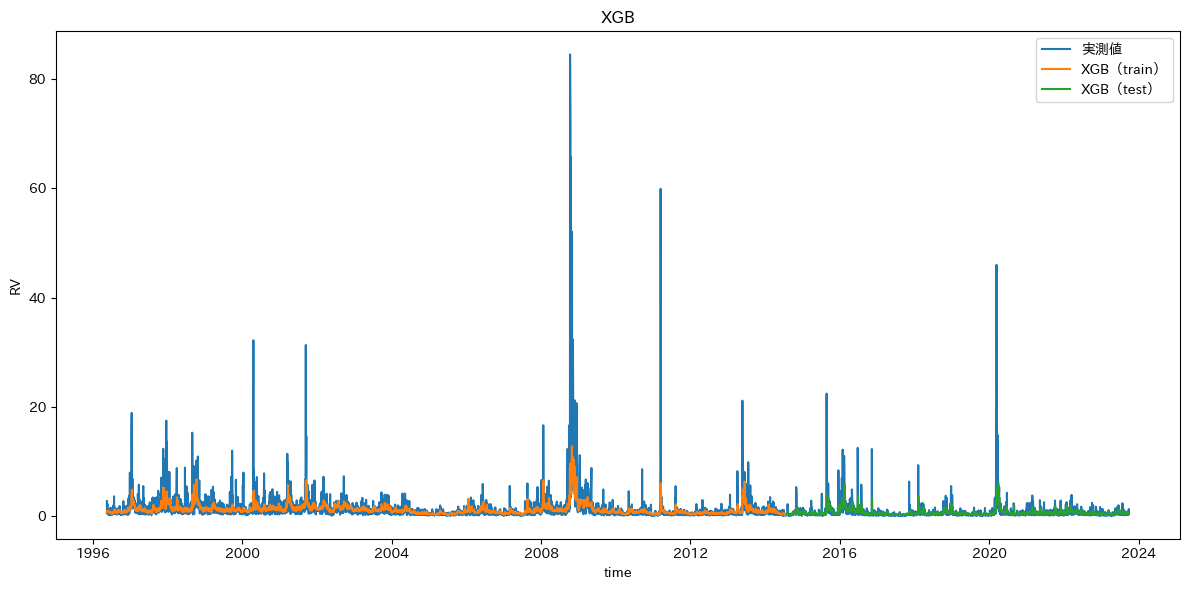

In [55]:
plot_prediction_split(data=data, actual_col='30min', pred_col='XGB', n_splits=n_splits, window_size=window_size)

### LightGBM

In [56]:
def tune_model_LGBM(X_train, y_train, X_val, y_val):
    """
    Optuna を用いて LightGBM のハイパーパラメータチューニングを行う関数。

    Args:
        X_train (ndarray): スケーリング済みの訓練特徴量
        y_train (ndarray): スケーリング済みの訓練目的変数
        X_val (ndarray): スケーリング済みの検証特徴量
        y_val (ndarray): スケーリング済みの検証目的変数

    Returns:
        best_params (dict): 最適なハイパーパラメータ
    """

    def objective(trial):
        # ハイパーパラメータ空間の定義
        n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True)
        num_leaves = trial.suggest_int("num_leaves", 20, 100)
        min_data_in_leaf = trial.suggest_int("min_data_in_leaf", 5, 50, step=1)

        # モデルの作成
        model = lgb.LGBMRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            num_leaves=num_leaves,
            min_data_in_leaf=min_data_in_leaf,
            random_state=42,
            n_jobs=-1,
            verbose=-1
        )

        # モデルの学習と評価
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        return mean_squared_error(y_val, y_val_pred)

    # Optunaのログ非表示（必要に応じて）
    optuna.logging.set_verbosity(optuna.logging.WARNING)

    # チューニング実行
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20)

    return study.best_params


In [57]:
def train_model_LGBM(X_train, y_train, X_val, y_val, best_params):
    """
    LightGBMを train + val データで学習する関数。

    Args:
        X_train (ndarray): 訓練データの特徴量
        y_train (ndarray): 訓練データの目的変数
        X_val (ndarray): 検証データの特徴量
        y_val (ndarray): 検証データの目的変数
        best_params (dict): Optuna などで得た最適なハイパーパラメータ

    Returns:
        model (LightGBM): 学習済みモデル
    """

    # 訓練データと検証データを結合して学習用データを作成
    X_trainval = np.concatenate([X_train, X_val], axis=0)
    y_trainval = np.concatenate([y_train, y_val], axis=0)

    # モデルの作成と学習
    model = lgb.LGBMRegressor(**best_params, random_state=42, n_jobs=-1)
    model.fit(X_trainval, y_trainval)

    return model

In [58]:
run_model_pipeline(data=data, embedding_flag=False, prepare_features_func=prepare_features_ML, n_splits=n_splits, window_size=window_size, scaler_func=scaler_ML, tune_model_func=tune_model_LGBM, train_model_func=train_model_LGBM, predict_func=predict_ML, model_name='LGBM')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,5min,30min,log_5min,return,return_abs,return_dummy,return_abs_times_dummy,HAR,LSTM,RF,XGB,LGBM
date,,,,,,,,,,,,
1996-03-11,1.50927,1.76196,0.411626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-12,0.48000,0.43200,-0.733969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-13,0.72100,0.91600,-0.327116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-14,0.48700,0.52000,-0.719491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-15,1.09568,0.71100,0.091375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,0.21900,0.21100,-1.518684,0.848824,0.848824,0.0,0.000000,0.290741,0.339109,0.271273,0.337515,0.366205
2023-09-26,0.36400,0.54600,-1.010601,-1.118798,1.118798,1.0,1.118798,0.351369,0.376603,0.321808,0.330603,0.338048
2023-09-27,0.35200,0.28700,-1.044124,0.175770,0.175770,0.0,0.000000,0.272862,0.304926,0.257259,0.294178,0.277314


In [59]:
evaluate_model(data=data, actual_col='30min', pred_col='LGBM', n_splits=n_splits, window_size=window_size, loss_name='MSE', loss_func=mean_squared_error)

2.0444522697173113

In [60]:
evaluate_model(data=data, actual_col='30min', pred_col='LGBM', n_splits=n_splits, window_size=window_size, loss_name='Q-LIKE', loss_func=q_like)

np.float64(0.2715772654402686)

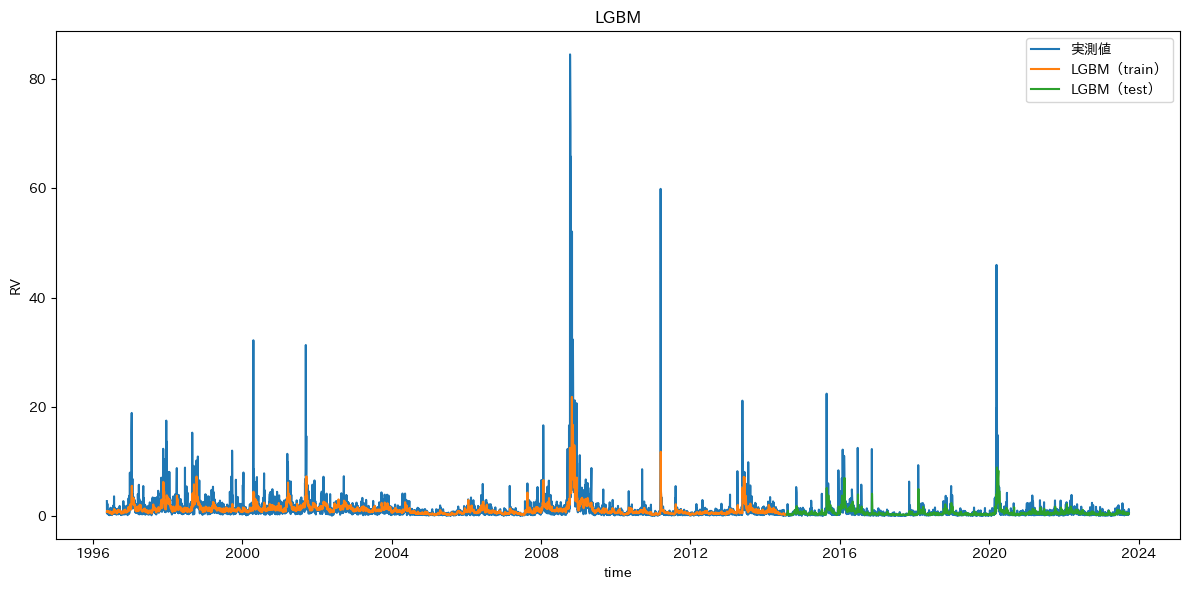

In [61]:
plot_prediction_split(data=data, actual_col='30min', pred_col='LGBM', n_splits=n_splits, window_size=window_size)

## モデル評価・比較

In [62]:
for model, scores in model_scores.items():
    print(f"{model}: MSE = {scores['MSE']}, Q-LIKE = {scores['Q-LIKE']}")

HAR: MSE = 1.9541895788854966, Q-LIKE = 0.26120666701300316
LSTM: MSE = 1.9910631980268403, Q-LIKE = 0.2534152874348953
RF: MSE = 2.0942516777299645, Q-LIKE = 0.277323487712536
XGB: MSE = 2.074064221720422, Q-LIKE = 0.2644704795873144
LGBM: MSE = 2.0444522697173113, Q-LIKE = 0.2715772654402686


In [65]:
data

,5min,30min,log_5min,return,return_abs,return_dummy,return_abs_times_dummy,HAR,LSTM,RF,XGB,LGBM
date,,,,,,,,,,,,
1996-03-11,1.50927,1.76196,0.411626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-12,0.48000,0.43200,-0.733969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-13,0.72100,0.91600,-0.327116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-14,0.48700,0.52000,-0.719491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-15,1.09568,0.71100,0.091375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,0.21900,0.21100,-1.518684,0.848824,0.848824,0.0,0.000000,0.290741,0.339109,0.271273,0.337515,0.366205
2023-09-26,0.36400,0.54600,-1.010601,-1.118798,1.118798,1.0,1.118798,0.351369,0.376603,0.321808,0.330603,0.338048
2023-09-27,0.35200,0.28700,-1.044124,0.175770,0.175770,0.0,0.000000,0.272862,0.304926,0.257259,0.294178,0.277314


In [68]:
def plot_model_predictions_split_grid(
    data,
    actual_col: str,
    model_cols: list,
    n_splits: int,
    window_size: int,
    nrows: int,
    ncols: int
):
    """
    複数モデルの予測値をグリッド状にプロットし、訓練・テスト期間を色分けする関数。

    Parameters:
    - data: pandas.DataFrame, 実測値と予測値を含む
    - actual_col: str, 実測値のカラム名
    - model_cols: list of str, 予測モデルのカラム名リスト
    - test_ratio: float, テスト期間の割合 (0 < test_ratio < 1)
    - nrows: int, サブプロットの行数
    - ncols: int, サブプロットの列数
    """
    # 実測値とモデル予測のNaN除去
    used_cols = [actual_col] + model_cols
    df = data[used_cols].dropna()
    idx = df.index

    # 分割位置（行番号ベース）
    total_len = len(idx)
    split_indices = np.linspace(0, total_len, n_splits + 1, dtype=int)

    # 訓練・テスト分割（行番号ベース）
    start = split_indices[0]
    end = split_indices[window_size]
    test_ratio = 1 / window_size
    test_start = int(start + (end - start) * (1 - test_ratio))

    # インデックスに変換
    train_idx = idx[start:test_start]
    test_idx = idx[test_start:]

    # サブプロット作成
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows), sharex=True)
    axes = np.array(axes).flatten()

    for i, model in enumerate(model_cols):
        if i >= nrows * ncols:
            break
        ax = axes[i]
        # 実測値
        ax.plot(idx, df[actual_col], label='実測値')
        # 訓練期間の予測
        ax.plot(train_idx, df.loc[train_idx, model], label=f'{model} (train)')
        # テスト期間の予測（強調）
        ax.plot(test_idx, df.loc[test_idx, model], label=f'{model} (test)')
        ax.set_title(model)
        ax.legend(loc='upper right', fontsize='small')

    # 余った軸は非表示
    for j in range(len(model_cols), nrows*ncols):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


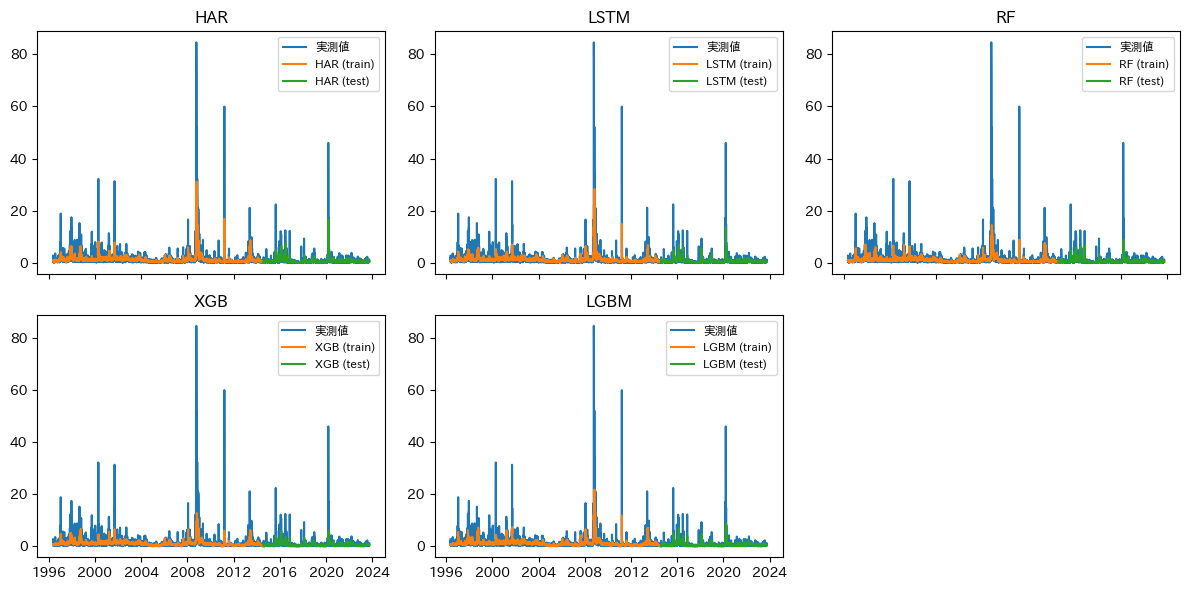

In [71]:
plot_model_predictions_split_grid(
    data=data,
    actual_col='30min',
    model_cols=['HAR', 'LSTM', 'RF', 'XGB', 'LGBM'],
    n_splits=n_splits,
    window_size=window_size,
    nrows=2,
    ncols=3
)

In [72]:
#実測値の列と予測値の列ののみ抽出
prediction = data[['30min', 'HAR', 'LSTM', 'RF', 'XGB', 'LGBM']]

# ファイルに出力
#prediction.to_csv("prediction.csv", index=False)

In [74]:
#損失テーブルの作成

In [75]:
# 欠損値の除去
prediction = prediction.dropna()

# データの行数
n = len(prediction)

In [76]:
percentage = (n_splits - window_size + 1) / n_splits

In [77]:
# テストデータの行数
test_size = int(np.floor(percentage * n))

# 下から test_size 行をテストデータに
test_data = prediction.iloc[-test_size:]

In [78]:
# 実測値の列名をユーザーに入力させる
actual_col = input("実測値の列名を入力してください: ")

実測値の列名を入力してください: 30min


In [79]:
# 実測値以外の列を予測値とする
pred_cols = [col for col in test_data.columns if col != actual_col]

In [80]:
# MSE の計算
loss_mse = pd.DataFrame({
    col: (test_data[col] - test_data[actual_col]) ** 2 for col in pred_cols
})

loss_mse.to_csv('loss_mse.csv', index=False)

In [81]:
# QLIKE の計算: log(予測値) + 実測値 / 予測値
loss_qlike = pd.DataFrame({
    col: np.log(test_data[col]) + (test_data[actual_col] / test_data[col]) for col in pred_cols
})

loss_qlike.to_csv('loss_qlike.csv', index=False)